<a href="https://colab.research.google.com/github/pauli31/gists/blob/master/notebookes/transformer/transformer_positional_encoding_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:

# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return pos_encoding



(1, 128, 256)


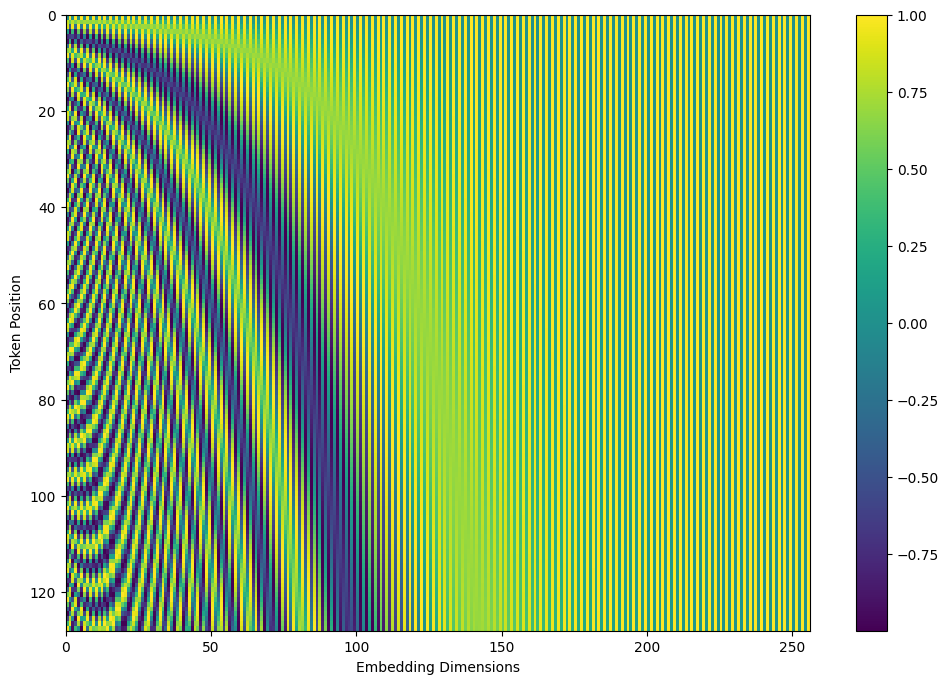

In [7]:
tokens = 128
dimensions = 256

pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)

plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

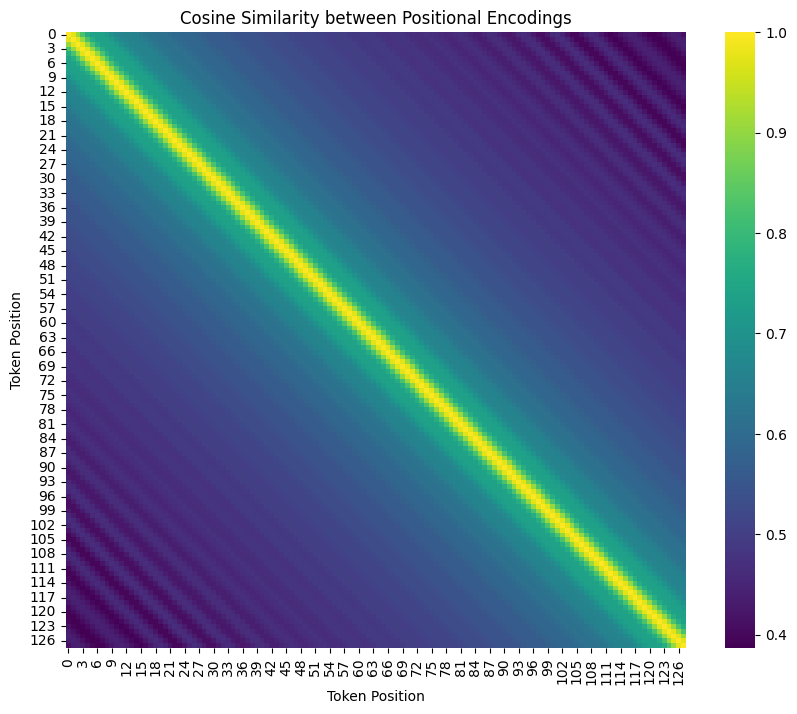

In [8]:
# prompt: For each row vector compute cosine similarity with all others row vectors and visualize it

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Reshape the positional encoding to have shape (tokens, dimensions)
# This removes the extra dimension added for broadcasting
pos_encoding_2d = pos_encoding[0]

# Compute cosine similarity between all pairs of row vectors
cosine_sim_matrix = cosine_similarity(pos_encoding_2d)

# Visualize the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix, cmap='viridis')
plt.xlabel('Token Position')
plt.ylabel('Token Position')
plt.title('Cosine Similarity between Positional Encodings')
plt.show()
